In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

data= pd.read_csv('/home/zakaria/projects/attrition_detection/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [2]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

the dataset has 1470 row and 35 columns , no missing values in any columns 
the dataset is also a mix of numerical and categorical columns

let's start with some univariate analysis and correct the type of the variables 

Some columns here  in the datset are declared as numerical , however they're categorical ( ordinal if i have to be precise )

The ones we're talking about are :

--> Education

--> EnvironmentSatisfaction

--> JobInvolvement

--> JobLevel

--> JobSatisfaction

--> PerformanceRating

--> RelationshipSatisfaction

--> StockOptionLevel

--> WorkLifeBalance


Also i noticed the presence of some constant columns that wouldn't have any effect on the study later on :

--> EmployeeCount

--> Over18

--> StandardHours

we'll extract them from the study however we'll keep the modality or the unique values , in order to flag new values 

For the dataset we'll have a table that summerizes the datset , for the numerical ones we'll keep the interval where this feature is ranging and for the categoricaal ones 
we'll store the modalities. the purpose is to keep to flage new observation that present new modlalities or values far from the range of numerical ones.


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


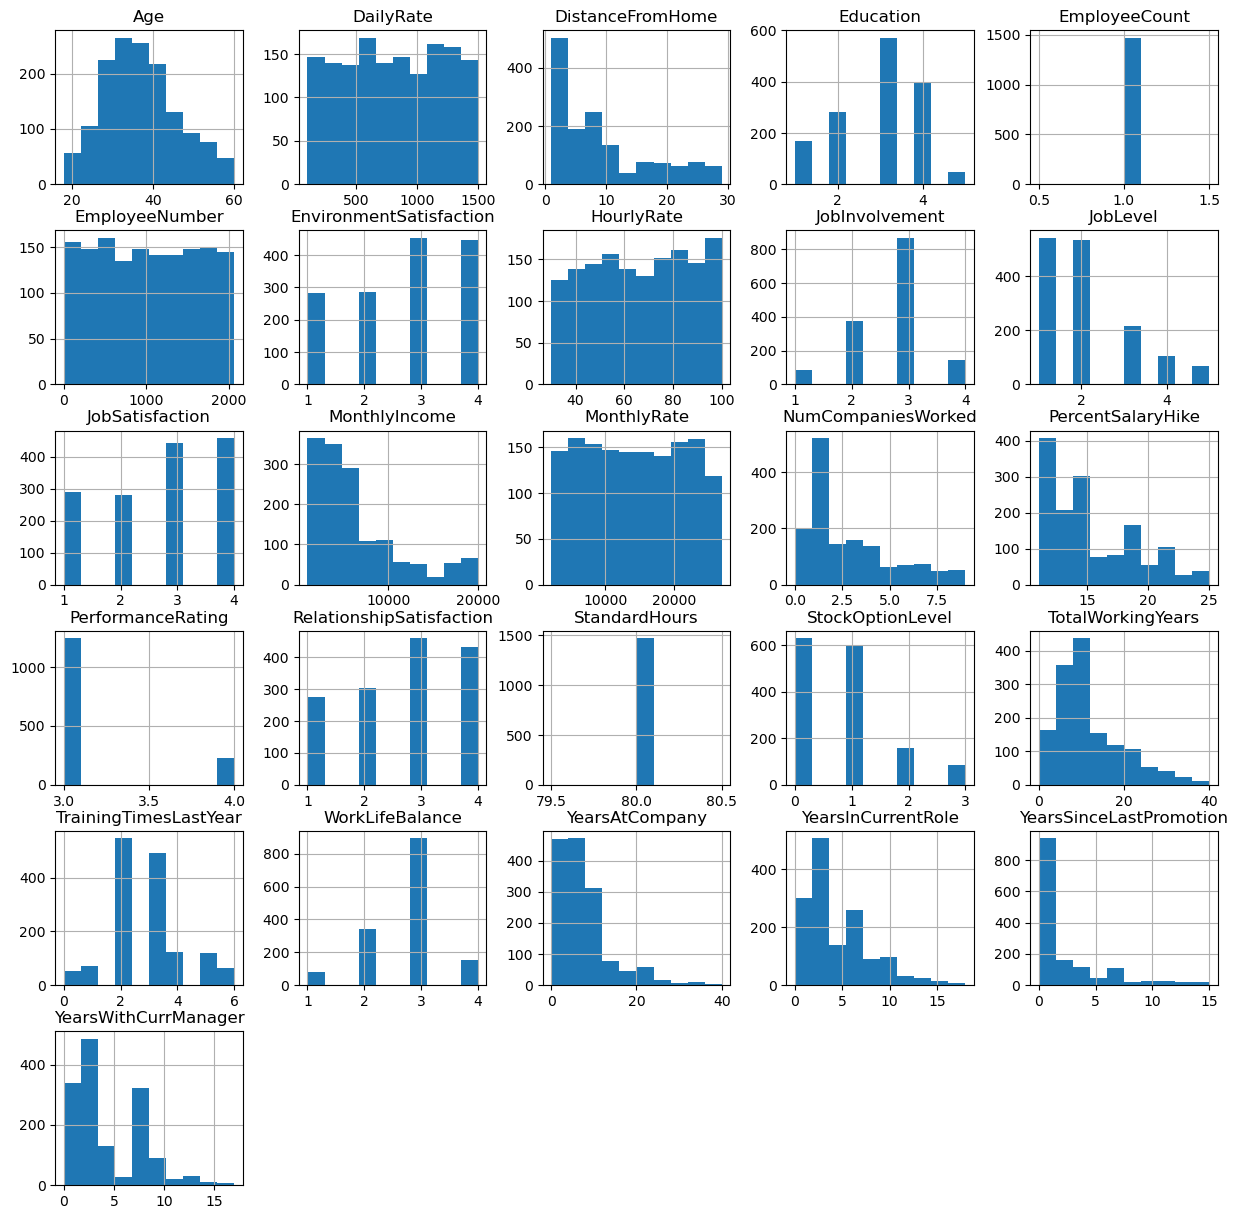

In [5]:
data.hist(figsize=(15,15)) #TODO add to the cheat sheet 
plt.show()

### Several insights can be drawn from the numerical feature distributions and their corresponding histograms:

### Many variables exhibit right-skewed distributions, such as MonthlyIncome, DistanceFromHome, and YearsAtCompany. Applying appropriate data transformation techniques (e.g., logarithmic or Box–Cox transformations) may help normalize these features before model training.

    Right skewness or positive skewness is when :
    
    most of the data values are concentrated on the left, near lower values.

    The tail extends to the right, meaning there are a few very large values (outliers).

     ⚠️ Why it matters for modeling:

         1- Distorted mean and variance

            The mean is pulled toward the tail (higher values), so it no longer represents the “typical” case.

            Models that rely on the mean (like linear regression) can be biased by those few large values.

         2- Reduced sensitivity or interpretability

            In highly skewed data, the model might overfit outliers or underfit the majority of cases. Because many algorithms — especially linear and least-squares-based ones — try to minimize the overall error, they can end up giving disproportionate attention to those rare large values. The model bends its prediction line or decision boundary to fit those few extreme points. As a result, it performs well for those rare cases but poorly for the vast majority of observations.

            Coefficients or feature importance can become misleading.

                In linear models:

                A one-unit increase in a highly skewed variable (like “income”) can represent a huge change for small values but a negligible change for large ones.
                Yet the coefficient assumes the relationship is linear and constant across all ranges — which isn’t true when the data is skewed. So, the coefficient might look large or small, but its practical meaning is distorted by the data’s shape.

                In tree-based or ensemble models (e.g., Random Forest, XGBoost):

                Skewed variables can appear artificially important because their long tails create more potential split points.
                The algorithm might split several times in those rare regions, making the feature seem informative — even if those regions correspond to very few real observations.

    

#### The Age variable follows an approximately normal distribution, slightly skewed to the right, with most employees aged between 25 and 45 years.

#### Both EmployeeCount and StandardHours show constant values across all observations, suggesting that they provide no discriminative information and can be safely removed from the dataset.

#### The EmployeeNumber variable displays a nearly uniform distribution, indicating that it likely serves as a unique identifier rather than a predictive feature.

In [23]:
#TODO i have to dig a bit more on how to solve the skewness problem and techniques used to solve the problem 

Now that we're done with the univariate analysis, we'll move to the bivariate one.
Since we're doing a supervised machine learning we're interestedd in the relationship that links each variable to the target .

## AGE

In [8]:
from scipy.stats import norm

print('Under the assumption that both the ditribution of age of ex-employees and current emplyees follows a normal distribution')

(mu, sigma) = norm.fit(data.loc[data['Attrition'] == 'Yes', 'Age'])
print('Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))

# Mathematically, it finds the values of μ and σ that maximize the likelihood of observing the data under a normal distribution model (this is Maximum Likelihood Estimation, MLE).


(mu, sigma) = norm.fit(data.loc[data['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))

""" 
For a finite population, variance is the average of the squared deviations from the mean.
A useful property of the standard deviation is that, unlike the variance, it is expressed in the same unit as the data.
"""

Under the assumption that both the ditribution of age of ex-employees and current emplyees follows a normal distribution
Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


' \nFor a finite population, variance is the average of the squared deviations from the mean.\nA useful property of the standard deviation is that, unlike the variance, it is expressed in the same unit as the data.\n'

We could have simply used .mean() and .std() to compute the mean and standard deviation, but that would have simply been descriptive metrics.

what we've done here is answer : “Let’s assume my data follow a normal law — what parameters (μ, σ) make this model most likely given my observed data?”

This is a probabilstic model of our data and can help us answer questions like : “What’s the probability that a random ex-employee is older than 50?”

### To investigate the relationship between employee age and churn, we will generate a KDE plot. This non-parametric method estimates the probability density function of 'Age' for each class of the target variable ('Churn' vs. 'No Churn'), allowing us to visually assess the correlation between the two.

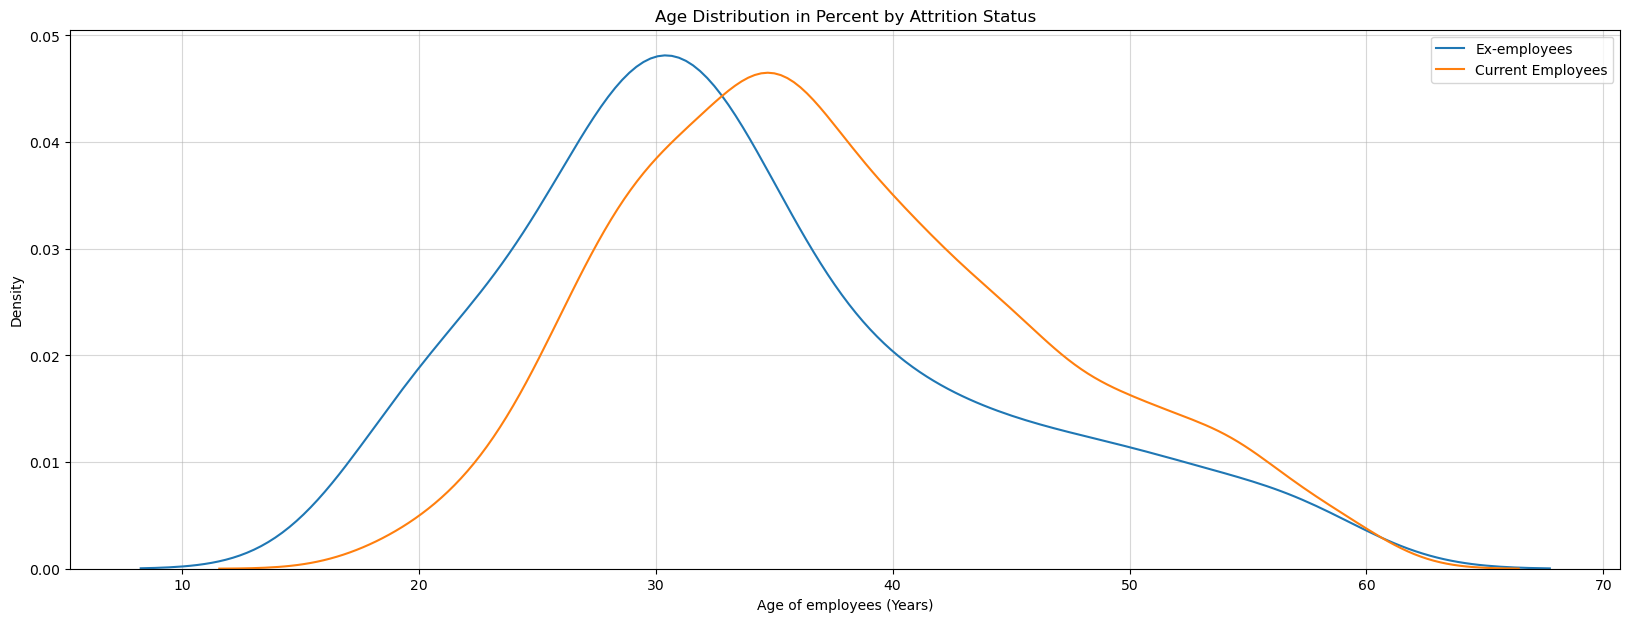

In [9]:
plt.figure(figsize = (20,7))
plt.grid(True , alpha = 0.5)

sns.kdeplot(data.loc[data['Attrition']=='Yes', 'Age'] , label = 'Ex-employees')
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'Age'], label = 'Current Employees')

plt.legend()
plt.xlabel('Age of employees (Years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status')
plt.show()

What KDE Represents?

At its core, a Kernel Density Estimation (KDE) is a smoothed version of a histogram.

KDE creates a smooth, continuous curve that estimates the underlying probability density function (PDF) of your data.

In simple terms, it tells you the relative likelihood of different values occurring. The area under the entire KDE curve equals 1 (just like a probability distribution).

How a KDE is Computed: The Intuitive Step-by-Step

The process is elegant and can be understood in three steps. Let's use a simple example with a few data points for age: [25, 27, 32, 35].

Step 1: Place a Kernel (a "Bump") on Each Data Point

For every single data point in your dataset, you center a special, symmetric, bell-shaped curve called a kernel. The most common kernel is the Gaussian (Normal) distribution, which looks like a smooth, tiny hill.

So, for our ages [25, 27, 32, 35], we would place four small Gaussian "bumps," each centered on one of these ages.

Step 2: Decide the "Smoothness" with a Bandwidth

The bandwidth (often denoted as h) is the most critical parameter in KDE. It controls the width of each kernel "bump."

    Small Bandwidth: The kernels are very narrow and tall. This leads to a wiggly, overfitted curve that follows the noise in the data too closely (high variance).

    Large Bandwidth: The kernels are very wide and flat. This oversmooths the data, potentially hiding important features (high bias).

Choosing the right bandwidth is a trade-off. Modern libraries like seaborn or scikit-learn automatically select a good default value using rules of thumb (like Scott's or Silverman's rule).

Step 3: Sum Up All the "Bumps" at Every Point

To get the final KDE curve, you simply add up the heights of all these individual kernel "bumps" at every point along the x-axis (in your case, the Age axis).

The formal formula for the estimated density at a point x is:

$$
\hat{f}_h(x) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - x_i)
= \frac{1}{n \cdot h} \sum_{i=1}^{n} K\!\left( \frac{x - x_i}{h} \right)
$$

Think of (x - x_i) as a distance measurement. It answers the question: "How far is the point I'm evaluating (x) from this specific data point (x_i)?"

    (x - x_i) = 0 → Maximum influence! The kernel gives full weight.

    (x - x_i) is small → Still strong influence

    (x - x_i) is large → Very little influence

(x - x_i) is the mathematical way of asking "How relevant is data point x_i for estimating the density at location x?"

The sum ∑ K_h(x - x_i) does this for EVERY data point simultaneously:

The bandwidth h acts like an "influence radius":

    Small h: Only VERY close points matter (x - x_i) must be tiny

    Large h: Points farther away still contribute (x - x_i) can be larger

The division (x - x_i)/h normalizes the distance by this influence radius.

## Education


Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other.

In [10]:
data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [11]:
for k in dict(data[data['Attrition']=='Yes']['EducationField'].value_counts()).keys():
    print(k)

Life Sciences
Medical
Marketing
Technical Degree
Other
Human Resources


In [12]:


all_employees = dict(data['EducationField'].value_counts())
ex_employees = dict(data[data['Attrition']=='Yes']['EducationField'].value_counts())

df_EducationField = pd.DataFrame(columns=["% of Leavers"] )


for ed_field in all_employees.keys():
    ratio = ex_employees[ed_field]/all_employees[ed_field]
    df_EducationField.loc[ed_field] = (ratio*100)

df_EducationField

,% of Leavers
Life Sciences,14.686469
Medical,13.577586
Marketing,22.012579
Technical Degree,24.242424
Other,13.414634
Human Resources,25.925926


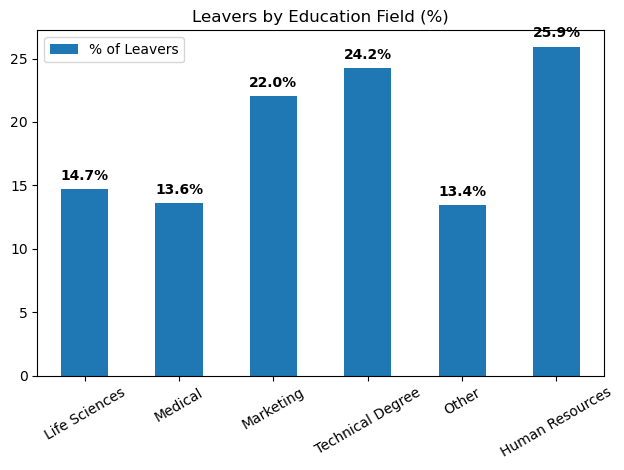

In [13]:


ax = df_EducationField.plot(kind='bar',title='Leavers by Education Field (%)')
plt.xticks(rotation = 30)

for i, (index, row) in enumerate(df_EducationField.iterrows()):

    value = row['% of Leavers']
    ax.text(i, value + 0.5, f'{value:.1f}%', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## Gender

In [14]:
data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

it seems like there is more men than women in the company we're studying

In [15]:


print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((data[(data['Attrition'] == 'Yes') & (
    data['Gender'] == 'Male')].shape[0] / data[data['Gender'] == 'Male'].shape[0])*100, (data[(data['Attrition'] == 'Yes') & (data['Gender'] == 'Female')].shape[0] / data[data['Gender'] == 'Female'].shape[0])*100))



Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


In [16]:
df_Gender = pd.DataFrame(columns=["% of Leavers"])

for gender in list(data['Gender'].unique()):
    ratio = data[(data['Gender']==gender)&(data['Attrition']=="Yes")].shape[0] / data[data['Gender']==gender].shape[0]
    df_Gender.loc[gender] = (ratio*100)

df_Gender

,% of Leavers
Female,14.795918
Male,17.006803


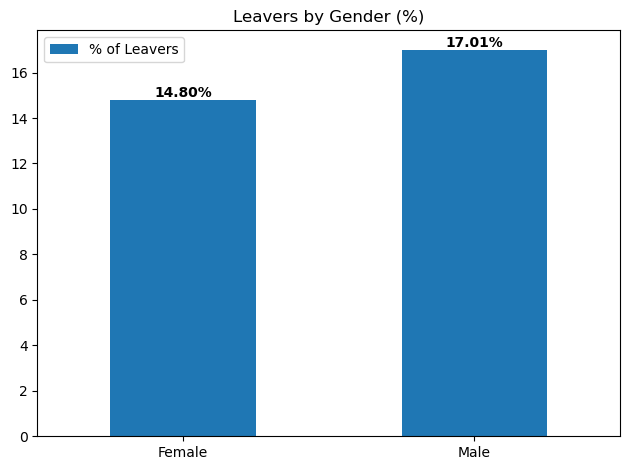

In [17]:

ax = df_Gender.plot(kind='bar',title='Leavers by Gender (%)')

for i, (index, row) in enumerate(df_Gender.iterrows()):

    value = row['% of Leavers']
    ax.text(i, value , f'{value:.2f}%', 
            ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

## Marital Status

In [21]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [22]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
#let's create a table of percentage of leavers by marital status

df_ms = pd.DataFrame(columns = ['% of Leavers'])

for m_status in data.MaritalStatus.unique():
    ratio = data[(data['MaritalStatus']== m_status) & (data.Attrition =='Yes')].shape[0] / len(data[data['MaritalStatus']== m_status])
    df_ms.loc[m_status]= (ratio*100)

df_ms



,% of Leavers
Single,25.531915
Married,12.481426
Divorced,10.091743


The company contains 3 categories of employees : Married (673), Single (470) and Divorced (327)
THe table above shows that , the category that has the highest percentage of leavers is the single one with a ration of 0.25
meaning that one out of every 4 single employees leaves the company 
Next is the married ones and last is the divorces ones with a ration of 1 to 10, which i think is pretty normal since they have an alimony to pay / kids to take care off


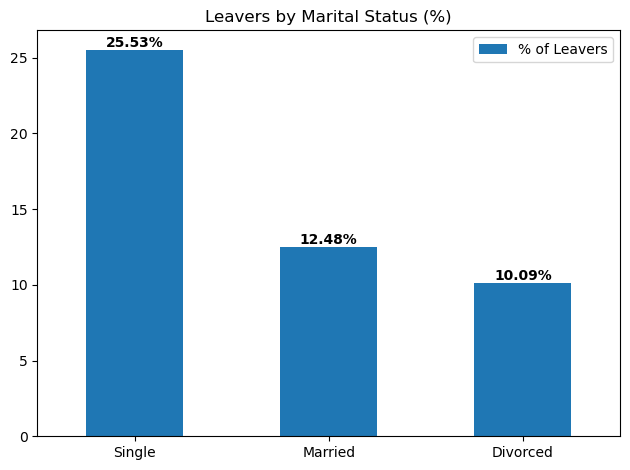

In [31]:

ax = df_ms.plot(kind='bar',title='Leavers by Marital Status (%)')

for i, (index, row) in enumerate(df_ms.iterrows()):
    value = row['% of Leavers']
    ax.text(i, value , f'{value:.2f}%', 
            ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [32]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Distance from Home

In [39]:
print('The distance that employees have to do each day varie between {:.1f} and {:.1f} miles'.format(data.DistanceFromHome.min(),data.DistanceFromHome.max()))


print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    data[data['Attrition'] == 'No']['DistanceFromHome'].mean(), data.loc[data['Attrition'] == 'Yes','DistanceFromHome'].mean()))




The distance that employees have to do each day varie between 1.0 and 29.0 miles
Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


We can see that on average, the ex-employees has to travel longer distance that the current employees 

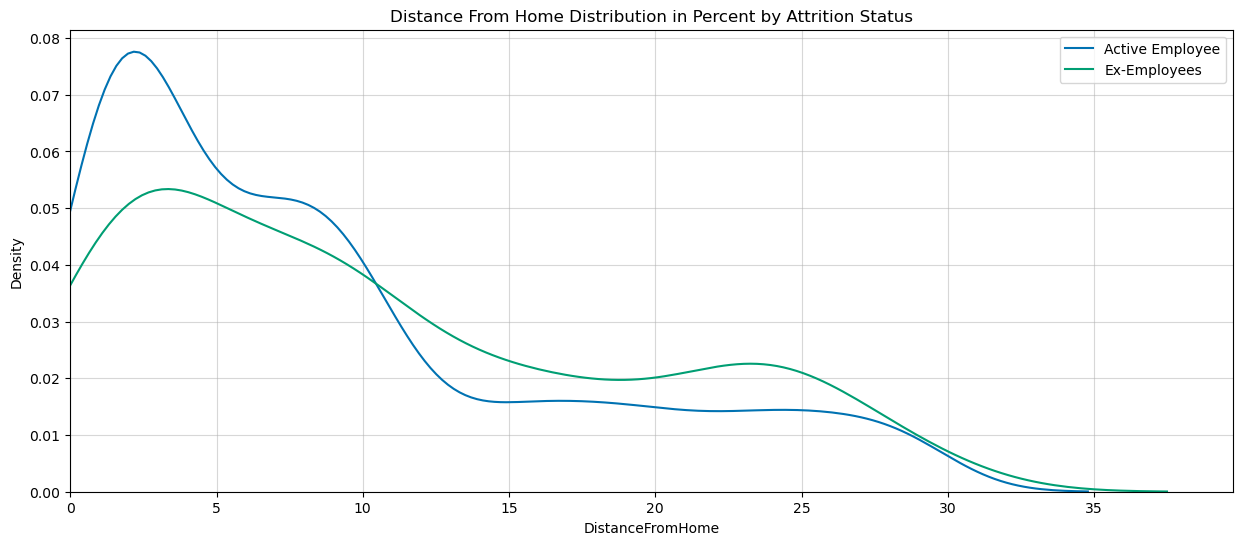

In [43]:

plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Distance From Home Distribution in Percent by Attrition Status');



## JobLevel


In [52]:
df_joblvl = pd.DataFrame(columns = ['% of Leavers'])

for lvl in data.JobLevel.unique():
    ratio = data[(data['JobLevel']==lvl)&(data['Attrition']=="Yes")].shape[0] / len(data[data.JobLevel == lvl])
    df_joblvl.loc[lvl] =(ratio*100)

df_joblvl

,% of Leavers
2,9.737828
1,26.335175
3,14.678899
4,4.716981
5,7.246377


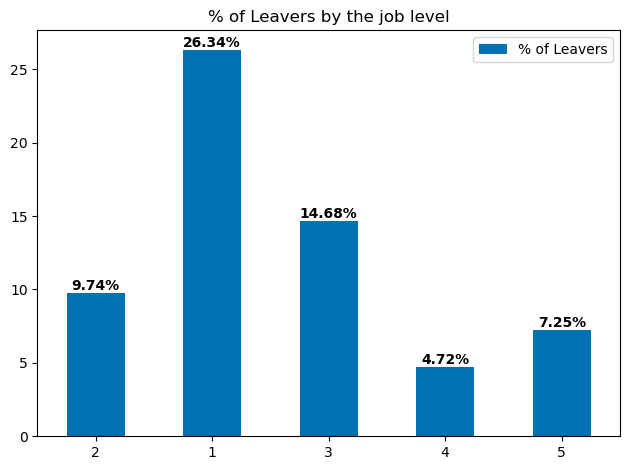

In [69]:
ax = df_joblvl.plot(kind='bar' , title = '% of Leavers by the job level' )

for i, (index, row) in enumerate(df_joblvl.iterrows()):
    value = row['% of Leavers']
    ax.text(i, value , f'{value:.2f}%', 
            ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


According to the dataset documentation, the joblevels are coded in an increasing level, meaning 1 corresponds to Low and 5 to very high

the histogram above shows a negative correlation betwween the job lebvel and the percentage of leavers in that cattegory,

 which means that employees with very important jobs seems to stay meanwhile the ones with low impact and less important task are more likely to churn 

## Working Years

In [72]:
print("The working years vary between {} and {} years ".format(data.YearsAtCompany.min(), data.YearsAtCompany.max()))

The working years vary between 0 and 40 years 


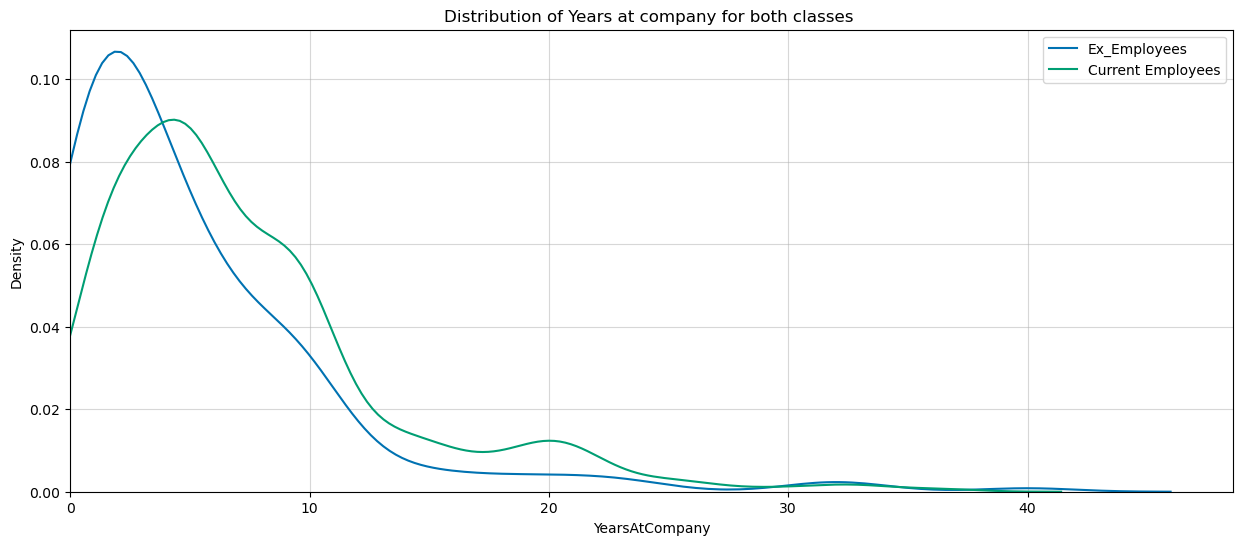

In [78]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data.Attrition == 'Yes' , 'YearsAtCompany'], label = 'Ex_Employees')
sns.kdeplot(data.loc[data.Attrition == 'No', 'YearsAtCompany'], label = 'Current Employees')
plt.title('Distribution of Years at company for both classes ')
plt.xlim(left=0)
plt.legend()
plt.show()

THe plot shows that a huge proportion of leavers are the ones with less that 5 years of working inside the company with a peak at 2-3 years

However the biggest proportion of current employees are the ones in the same category between 0-10 years , so the company better do something before these majority leaves as well

## Correlation

In [99]:

# Find correlations with the target and sort
data_trans = data.copy()
data_trans['Target'] = data_trans['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
data_trans = data_trans.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18',
                              'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'], axis=1)


In [ ]:

correlations = data_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))



Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<AxesSubplot: >

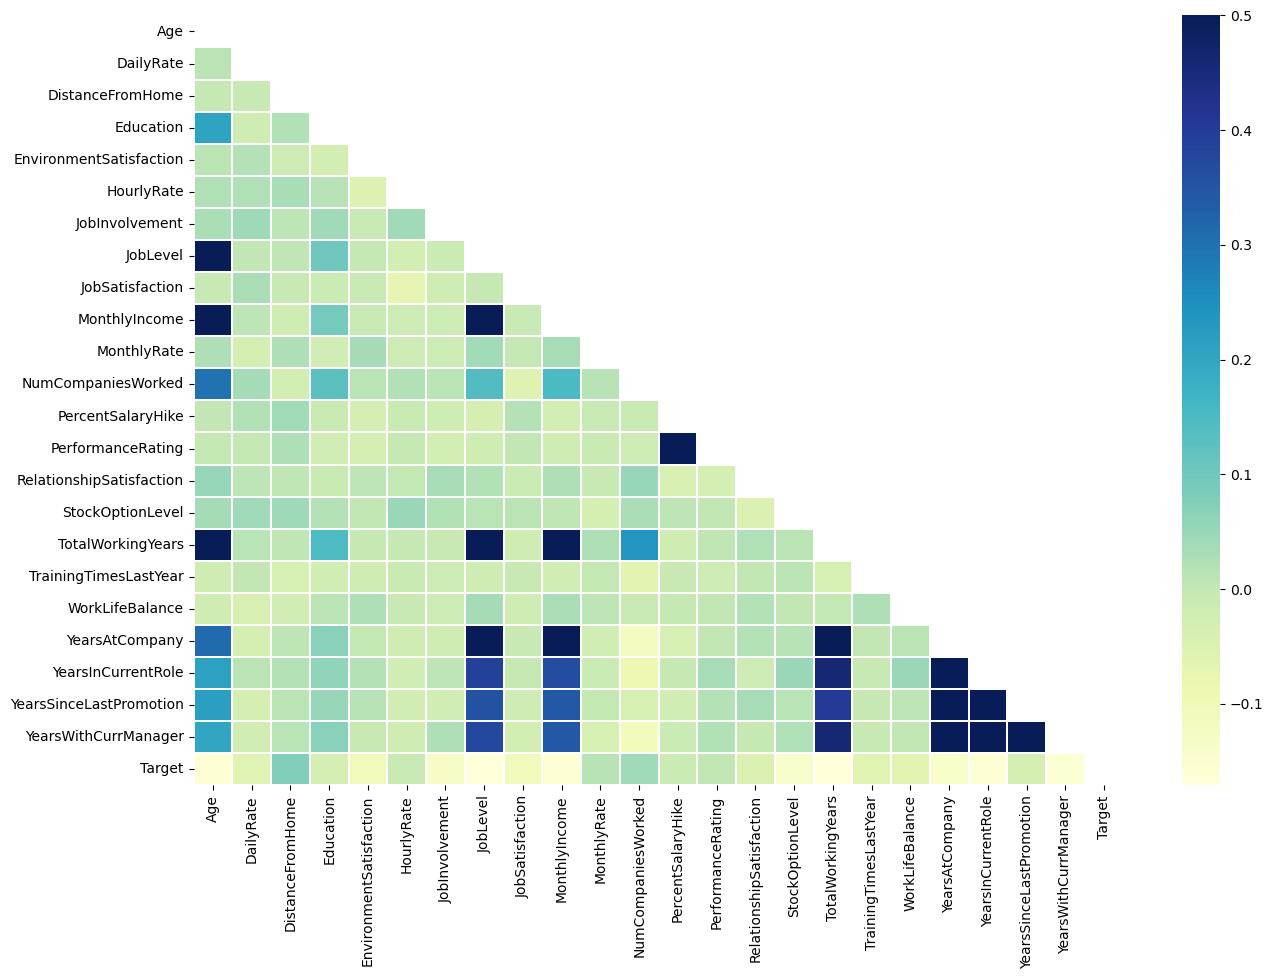

In [101]:
import numpy as np

# Calculate correlations
corr = data_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

